In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

df=pd.read_csv('Car_Data.xlsx - cars_ds_final.csv')

# Level 0: analysis

In [2]:
df.head(5)

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1258, 139)

In [4]:
df.columns

Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration',
       'Engine_Location',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=139)

In [5]:
df.isnull().sum()

S. No.                 0
Make                  75
Model                  0
Variant                0
Displacement          11
                    ... 
USB_Ports           1237
Heads-Up_Display    1207
Welcome_Lights      1190
Battery             1245
Electric_Range      1242
Length: 139, dtype: int64

# Level 1 Analysis

In [6]:
list_1 = df.select_dtypes(include="object")
list_2 = df.select_dtypes(exclude= "object")
print(tabulate({"Categorical":list_1,"numerical":list_2},headers=["Categorical","numerical"]))

Categorical                                numerical
-----------------------------------------  ------------------------
Make                                       S. No.
Model                                      Displacement
Variant                                    Cylinders
Drivetrain                                 Valves_Per_Cylinder
Cylinder_Configuration                     Fuel_Tank_Capacity_litre
Engine_Location                            Height_mm
Fuel_System                                Length_mm
Fuel_Type                                  Width_mm
Body_Type                                  Doors
ARAI_Certified_Mileage                     City_Mileage_km_litre
ARAI_Certified_Mileage_for_CNG             Highway_Mileage_km_litre
Kerb_Weight                                Seating_Capacity
Gears                                      Boot_Space_litre
Ground_Clearance                           Minimum_Turning_Radius
Front_Brakes                               Number_of_Airbags
Re

In [7]:
df['City_Mileage_km_litre'] = df.groupby(['Make', 'Model'])['City_Mileage_km_litre'].transform(lambda x: x.fillna(x.mean()))
df['Highway_Mileage_km_litre'] = df.groupby(['Make', 'Model'])['Highway_Mileage_km_litre'].transform(lambda x: x.fillna(x.mean()))
df['Displacement'] = df.groupby(['Make', 'Model'])['Displacement'].transform(lambda x: x.fillna(x.mean()))
df['Cylinders'] = df.groupby(['Make', 'Model'])['Cylinders'].transform(lambda x: x.fillna(x.mean()))
df['Fuel_Tank_Capacity_litre'] = df.groupby(['Make', 'Model'])['Fuel_Tank_Capacity_litre'].transform(lambda x: x.fillna(x.mean()))


# Market Segmentation Analysis

# TASK1

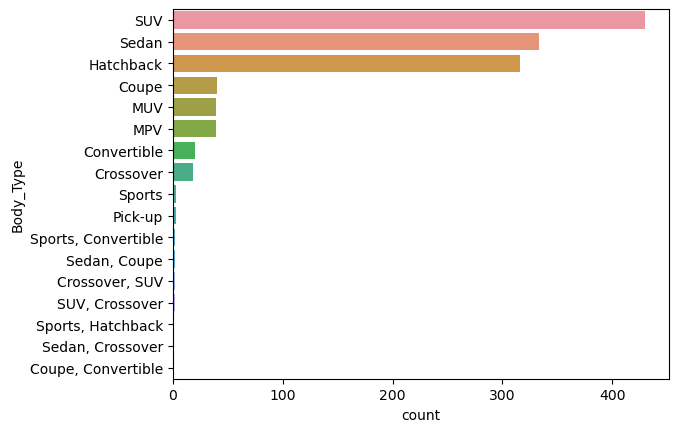

In [8]:
sns.countplot(df, y="Body_Type",order=df['Body_Type'].value_counts(ascending=False).index)
plt.show()



### INTERPRETATION :As per the above graph "SUV" body-type in car is more prefer than "Sedan" and other.

# TASK2

In [9]:
df['Drive_Modes'].value_counts()

Normal                                     91
Normal, Comfort, Eco, Sport                34
Sport                                      18
Normal, Eco                                11
Normal, Eco, Sport                          9
Normal, Comfort, Sport                      6
Normal, Sport                               6
Comfort, Eco, Sport, Normal                 4
Comfort, Eco, Sport                         3
Eco, Sport, Normal, Comfort                 3
Eco, Sport                                  2
Normal, Comfort, Eco, Sport, Power Mode     2
Eco                                         1
Eco, Sport, Normal                          1
Sport, Normal, Eco                          1
Sport, Normal, Comfort                      1
Name: Drive_Modes, dtype: int64

In [10]:
all_mode = df[(df.Drive_Modes == "Normal, Comfort, Eco, Sport, Power Mode")]
all_mode

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
319,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
328,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


#### INTERPRETATION:2 cars are listed out with all other details of different driving modes.

# Fuel Efficiency Analysis

# TASK3

In [11]:
df=df.sort_values('City_Mileage_km_litre',ascending=False)

In [12]:
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
683,687,Mahindra,E Verito,D4,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
684,688,Mahindra,E Verito,D2,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
685,689,Mahindra,E Verito,D6,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
612,616,Mahindra,E2O Plus,P6,NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
611,615,Mahindra,E2O Plus,P4,NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1233,1251,NaN,Mercedes-Benz Glc,200 Progressive,NaN,NaN,4.0,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN
1234,1252,NaN,Mercedes-Benz Glc,220D 4Matic Progressive,NaN,NaN,4.0,AWD (All Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN
1235,1253,Porsche,Cayenne Coupe,Base,2995.0,6.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


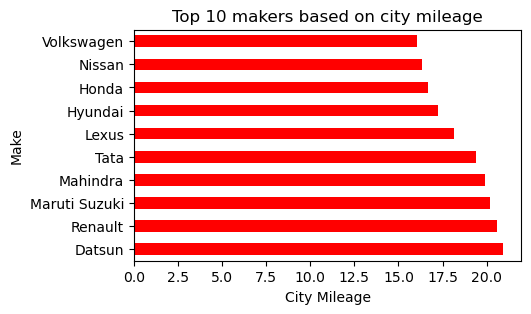

In [13]:
fig = plt.figure(figsize =(5, 3)) 
df.groupby(['Make'])['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(10).plot(kind='barh',color='red') 
plt.xlabel('City Mileage')
plt.title('Top 10 makers based on city mileage')
plt.show()

### INTERPRETATION:
: Top 10  car manufacturers based on city mileage in market are listed in above graph, when compare to other Renault,Mahindra,Maruti and Datsun are the Manufacturers which have high mileage .

# TASK4

In [14]:
df_nonelectric=df[(df['Fuel_Type']!='Electric')]

In [15]:
df_nonelectric1=df_nonelectric.groupby(['Make'])['City_Mileage_km_litre'].mean().sort_values().tail(20)

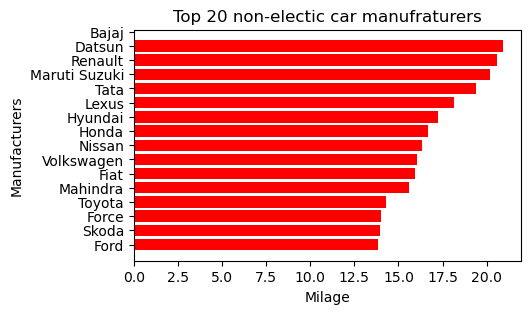

In [16]:
fig = plt.figure(figsize =(5, 3)) 
plt.barh(df_nonelectric1.index,df_nonelectric1.values,color='red')
plt.title('Top 20 non-electic car manufraturers')
plt.xlabel('Milage')
plt.ylabel('Manufacturers')
plt.show()

### INTERPRETATION : Above graph show us that Manufactures with non-electrical car in market, when compare to other Renault,Maruti,Datsun are the Manufacturer which have high mileage .

# TASK5

In [17]:
l=['Hyundai', 'Renault', 'Mahindra', 'Skoda']
dfC=df[df.Make.isin(l)]

In [18]:

pivotC = dfC.pivot_table(index=['Make'], values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],
                       aggfunc={'median', 'mean'})

In [19]:
pivotC

City_Mileage_km_litre        Highway_Mileage_km_litre       
                          mean median                     mean median
Make                                                                 
Hyundai              17.242797  16.95                18.691746  19.58
Mahindra             19.919474  16.00                17.250125  15.40
Renault              20.554286  21.04                17.690000  19.60
Skoda                13.953333  14.50                16.836429  15.41

### INTERPRETATION:
From the table we can obseve that Renault and Hyundai is giving good mileage on city.

# TASK6

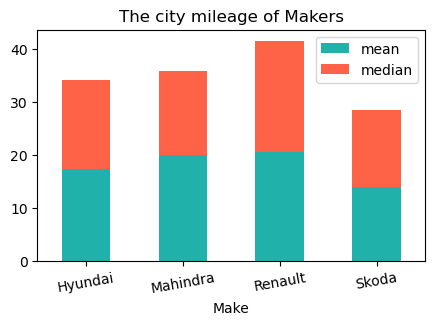

In [20]:

ax = pivotC['City_Mileage_km_litre'].plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(5,3))
ax.set_title('The city mileage of Makers')
plt.xticks(rotation=10)
plt.show()

#### INTERPRETATION :
From the Above Stacked bar chart Renault and Mahindra  gives good Mileage in city and High-way as well.

# TASK7

In [21]:
df1=df.groupby(['Make'])['City_Mileage_km_litre','Highway_Mileage_km_litre'].mean()
df_Mileage=df1.sort_values(['City_Mileage_km_litre','Highway_Mileage_km_litre'],ascending=True)


In [22]:
df_Mileage

,City_Mileage_km_litre,Highway_Mileage_km_litre
Make,,
Ferrari,4.320000,6.900000
Maserati,4.900000,5.966667
Lamborghini,5.500000,6.266667
Bentley,5.783333,8.716667
Aston Martin,6.700000,10.450000
Mitsubishi,6.791667,10.676667
Land Rover Rover,7.498841,11.646970
Dc,8.000000,10.000000
Porsche,8.400000,8.071429


<Figure size 200x200 with 0 Axes>

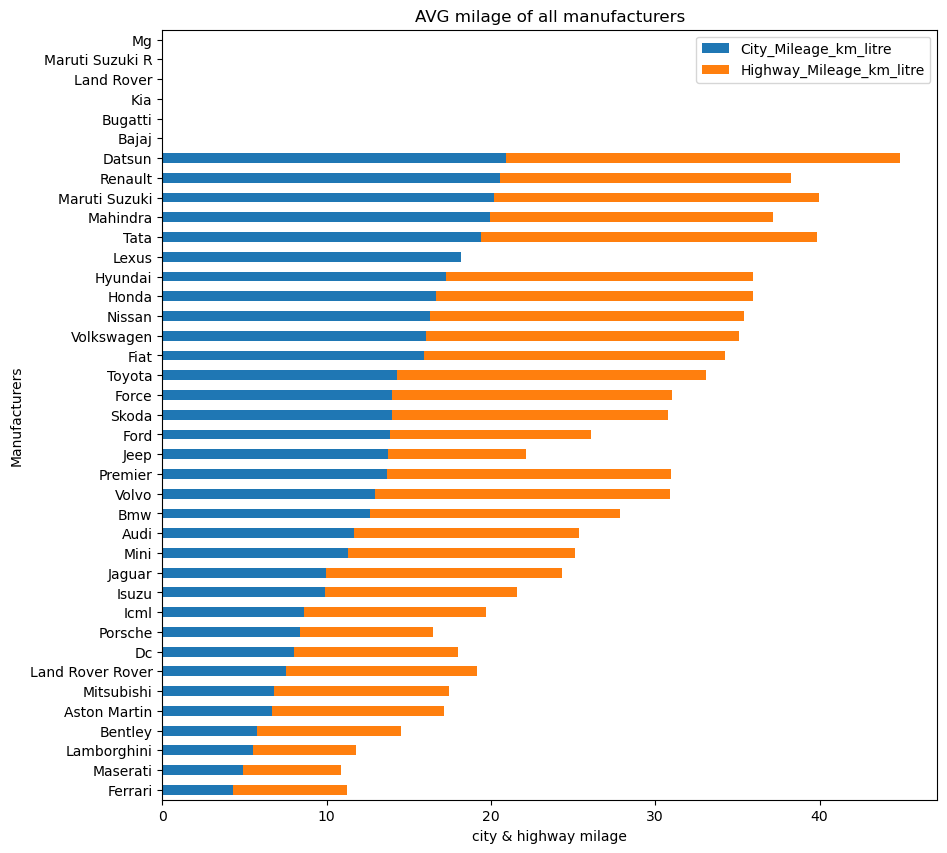

In [23]:
fig = plt.figure(figsize =(2, 2)) 
df_Mileage.plot(column='Make', kind='barh', stacked=True, title='AVG milage of all manufacturers',
             xlabel='city & highway milage', ylabel='Manufacturers',figsize = (10, 10))

plt.show()

#### INTEPRETATION:

1.'Renault,Mahindra and Maruti have the highest city milage and 'Datsun an Tata have the highest highway milage.
2.As per the above graph 'Lamborghini' has the lowest city milage and 'Bentley' has the lowest highway milage.

# TASK8

In [24]:
top_milage = df.groupby(["Make"])["Displacement","City_Mileage_km_litre"].mean()
top_10_milage = top_milage.sort_values(by= ["City_Mileage_km_litre"]).tail(10)
top_10_milage1 = pd.DataFrame(top_10_milage)
top_10_milage1

,Displacement,City_Mileage_km_litre
Make,,
Mahindra,1719.632479,19.919474
Maruti Suzuki,1171.731544,20.182892
Renault,1238.583333,20.554286
Datsun,1065.066667,20.912000
Bajaj,216.000000,NaN
Bugatti,7993.000000,NaN
Kia,1635.380952,NaN
Land Rover,2795.000000,NaN
Maruti Suzuki R,1083.285714,NaN


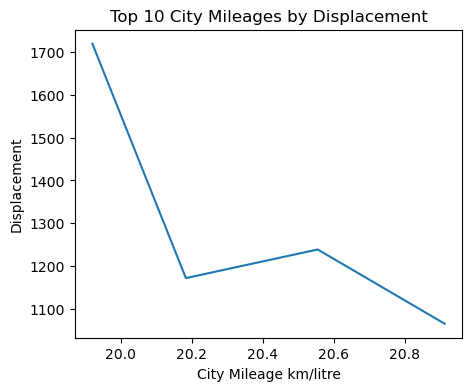

In [25]:
fig = plt.figure(figsize =(5, 4)) 
plt.plot(top_10_milage1['City_Mileage_km_litre'],top_10_milage1['Displacement'])
plt.title("Top 10 City Mileages by Displacement")
plt.xlabel("City Mileage km/litre")
plt.ylabel("Displacement")
plt.show()

#### INTERPRETATION: As per the graph displacement is inversely propotional to mileage.

# TASK9

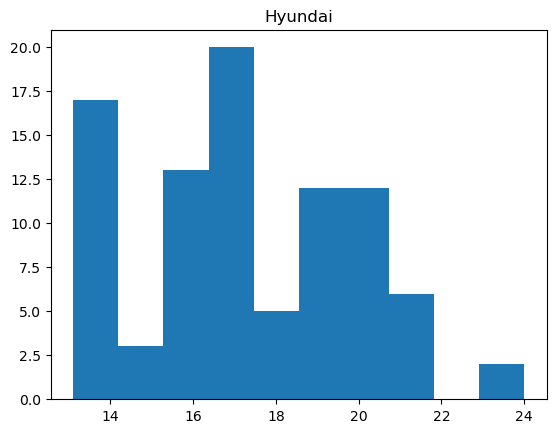

In [26]:
df_carh=df[df['Make']=='Hyundai']
df_carh
plt.hist(df_carh['City_Mileage_km_litre'])
plt.title('Hyundai')
plt.show()

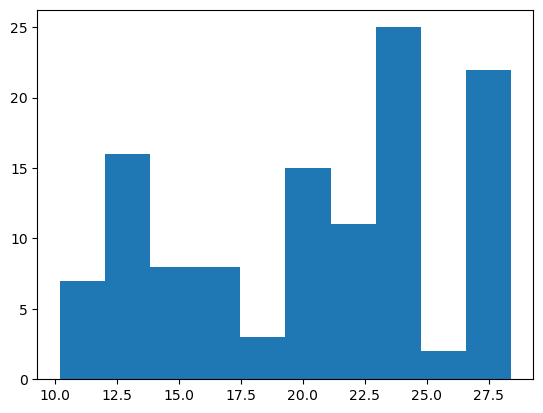

In [27]:
df_carsu=df[df['Make']=='Maruti Suzuki']
df_carsu
plt.hist(df_carsu['City_Mileage_km_litre'])
plt.show()

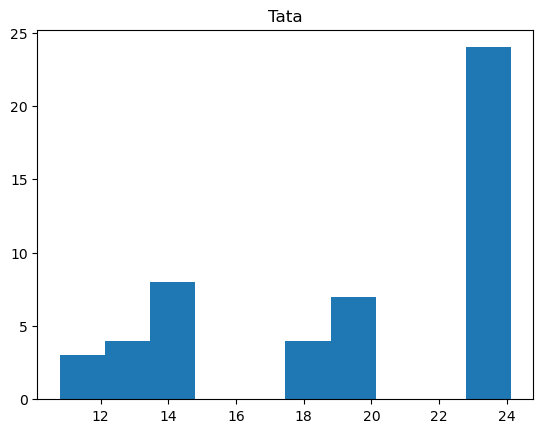

In [60]:
df_cartata=df[df['Make']=='Tata']
df_cartata
plt.hist(df_cartata['City_Mileage_km_litre'])
plt.title('Tata')
plt.show()

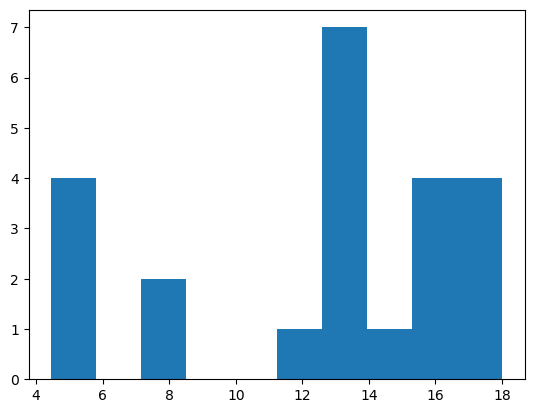

In [29]:
df_carbmw=df[df['Make']=='Bmw']
df_carbmw
plt.hist(df_carbmw['City_Mileage_km_litre'])
plt.show()

#### INTERPRETATION: As per the histogram Hyundai is positively skewed Maruthi suzuki and Tata  are negatively skewed.Bmw is showing no skewness

# PART-2

## TASK1

In [30]:
df_car = df[['Cylinders','Kerb_Weight','Make','Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Power','Torque','Valves_Per_Cylinder','Gross_Vehicle_Weight']].copy()


In [31]:
df_car

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Valves_Per_Cylinder,Gross_Vehicle_Weight
683,NaN,NaN,Mahindra,72.0,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,NaN,1700 kg
684,NaN,NaN,Mahindra,72.0,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,NaN,1700 kg
685,NaN,NaN,Mahindra,72.0,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,NaN,1700 kg
612,NaN,937 kg,Mahindra,NaN,NaN,80.0,NaN,25.8PS@3500rpm,70Nm@1000rpm,NaN,1257 kg
611,NaN,937 kg,Mahindra,NaN,NaN,80.0,NaN,25.8PS@3500rpm,70Nm@1000rpm,NaN,1257 kg
...,...,...,...,...,...,...,...,...,...,...,...
1232,4.0,1395 kg,Skoda,1968.0,50.0,NaN,15.0,143PS@4000rpm,320Nm@1750-3000rpm,4.0,1915 kg
1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197PS@6100rpm,320Nm@1650-4000rpm,4.0,2360 kg
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194PS@3800rpm,400Nm@1600-2800RPM,4.0,2500 kg
1235,6.0,2030 kg,Porsche,2995.0,75.0,NaN,NaN,340PS@6400rpm,450Nm@1340-5300,4.0,2105 kg


In [32]:
df_car.dtypes

Cylinders                   float64
Kerb_Weight                  object
Make                         object
Displacement                float64
Fuel_Tank_Capacity_litre    float64
City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
Power                        object
Torque                       object
Valves_Per_Cylinder         float64
Gross_Vehicle_Weight         object
dtype: object

In [33]:
df_car.isnull().sum()

Cylinders                   107
Kerb_Weight                 350
Make                         75
Displacement                 85
Fuel_Tank_Capacity_litre    111
City_Mileage_km_litre       470
Highway_Mileage_km_litre    671
Power                         1
Torque                        2
Valves_Per_Cylinder         100
Gross_Vehicle_Weight        578
dtype: int64

In [34]:
df_car['Cylinders'] = df_car.groupby(['Make'])['Cylinders'].transform(lambda x: x.fillna(x.mean()))
df_car['Valves_Per_Cylinder'] = df_car.groupby(['Make'])['Valves_Per_Cylinder'].transform(lambda x: x.fillna(x.mean()))
df_car['Displacement'] = df_car.groupby(['Make'])['Displacement'].transform(lambda x: x.fillna(x.mean()))
df_car['Kerb_Weight'] = df_car['Kerb_Weight'].fillna('0')
#df_car['Power'] = df_car['Power'].fillna(0)
#df_car['Torque'] = df_car['Torque'].fillna(0)
#df_car['Gross_Vehicle_Weight'] = df_car['Gross_Vehicle_Weight'].fillna(0)

# TASK2

In [35]:
df_car['Kerb_Weight'] = df_car['Kerb_Weight'].str.replace(r"kg",'') # replacing all occurances of kg with "" (nothing) i.e removing "kg"
df_car

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Valves_Per_Cylinder,Gross_Vehicle_Weight
683,3.666667,0,Mahindra,72.000000,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,3.680851,1700 kg
684,3.666667,0,Mahindra,72.000000,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,3.680851,1700 kg
685,3.666667,0,Mahindra,72.000000,NaN,110.0,NaN,41PS@3500RPM,91Nm@3000rpm,3.680851,1700 kg
612,3.666667,937,Mahindra,1719.632479,NaN,80.0,NaN,25.8PS@3500rpm,70Nm@1000rpm,3.680851,1257 kg
611,3.666667,937,Mahindra,1719.632479,NaN,80.0,NaN,25.8PS@3500rpm,70Nm@1000rpm,3.680851,1257 kg
...,...,...,...,...,...,...,...,...,...,...,...
1232,4.000000,1395,Skoda,1968.000000,50.0,NaN,15.0,143PS@4000rpm,320Nm@1750-3000rpm,4.000000,1915 kg
1233,NaN,0,NaN,NaN,NaN,NaN,NaN,197PS@6100rpm,320Nm@1650-4000rpm,NaN,2360 kg
1234,NaN,0,NaN,NaN,NaN,NaN,NaN,194PS@3800rpm,400Nm@1600-2800RPM,NaN,2500 kg
1235,6.000000,2030,Porsche,2995.000000,75.0,NaN,NaN,340PS@6400rpm,450Nm@1340-5300,4.000000,2105 kg


In [36]:
df_car.Kerb_Weight = df_car.Kerb_Weight.astype(int)
df_car['Kerb_Weight']=df_car['Kerb_Weight']* 2.2

In [37]:
df_car['Kerb_Weight'] = df_car.groupby(['Make'])['Kerb_Weight'].transform(lambda x: x.fillna(x.mean()))

In [38]:
# Regular expression used for cleaning the Power column 
df_car["Power"] = df_car["Power"].str.strip () # stripping white spaces if any 
df_car['Power'] = df_car['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 


In [39]:
df_car["Torque"] = df_car["Torque"].str.strip() # stripping white spaces if any 
df_car['Torque'] = df_car['Torque'].str.replace(r"-",'', regex=True) # Removing any occurances of "-" in this the column
df_car['Torque'] = df_car['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 

df_car

,Cylinders,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Valves_Per_Cylinder,Gross_Vehicle_Weight
683,3.666667,0.0,Mahindra,72.000000,NaN,110.0,NaN,41,91,3.680851,1700 kg
684,3.666667,0.0,Mahindra,72.000000,NaN,110.0,NaN,41,91,3.680851,1700 kg
685,3.666667,0.0,Mahindra,72.000000,NaN,110.0,NaN,41,91,3.680851,1700 kg
612,3.666667,2061.4,Mahindra,1719.632479,NaN,80.0,NaN,25.8,70,3.680851,1257 kg
611,3.666667,2061.4,Mahindra,1719.632479,NaN,80.0,NaN,25.8,70,3.680851,1257 kg
...,...,...,...,...,...,...,...,...,...,...,...
1232,4.000000,3069.0,Skoda,1968.000000,50.0,NaN,15.0,143,320,4.000000,1915 kg
1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197,320,NaN,2360 kg
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194,400,NaN,2500 kg
1235,6.000000,4466.0,Porsche,2995.000000,75.0,NaN,NaN,340,450,4.000000,2105 kg


# Performance Comparison

# TASK3

In [40]:
x=df_car.groupby(by='Make')['Cylinders','Displacement','Valves_Per_Cylinder'].agg(['mean','median','std'])

In [41]:
x

Cylinders                      Displacement          \
                       mean     median       std         mean  median   
Make                                                                    
Aston Martin      10.666667  12.000000  2.309401  5038.333333  5198.0   
Audi               5.161290   4.000000  1.614451  2256.354839  1984.0   
Bajaj                   NaN        NaN       NaN   216.000000   216.0   
Bentley           10.666667  12.000000  2.065591  5447.833333  5974.0   
Bmw                5.459459   6.000000  1.608909  2707.918919  2979.0   
Bugatti           16.000000  16.000000  0.000000  7993.000000  7993.0   
Datsun             3.000000   3.000000  0.000000  1065.066667  1198.0   
Dc                 4.000000   4.000000       NaN  2000.000000  2000.0   
Ferrari            8.000000   8.000000  0.000000  4317.142857  3902.0   
Fiat               4.000000   4.000000  0.000000  1269.391304  1248.0   
Force              4.000000   4.000000  0.000000  2447.000000  2596.0   
Ford               3.883721   4.000000  0.793104  1551.325581  1498.0   
Honda              4.000000   4.000000  0.000000  1444.875000  1498.0   
Hyundai            3.931034   4.000000  0.242173  1350.195312  1197.0   
Icml               4.000000   4.000000  0.000000  1994.000000  1994.0   
Isuzu              4.000000   4.000000  0.000000  2578.800000  2499.0   
Jaguar             5.207792   4.000000  1.488359  2679.545455  1999.0   
Jeep               5.857143   6.000000  0.755929  2102.357143  1956.0   
Kia                4.000000   4.000000  0.000000  1635.380952  1493.0   
Lamborghini       10.307692  10.000000  1.109400  5409.692308  5204.0   
Land Rover         5.600000   6.000000  0.843274  2795.000000  2993.0   
Land Rover Rover   6.370370   6.000000  1.667521  3199.703704  2993.0   
Lexus              5.750000   6.000000  0.623610  3491.600000  3456.0   
Mahindra           3.666667   4.000000  0.463346  1719.632479  1497.0   
Maruti Suzuki      3.664430   4.000000  0.473782  1171.731544  1197.0   
Maruti Suzuki R    3.000000   3.000000  0.000000  1083.285714   998.0   
Maserati           6.666667   6.666667  0.816497  3363.888889  2987.0   
Mg                      NaN        NaN       NaN          NaN     NaN   
Mini               3.800000   4.000000  0.421637  1897.600000  1998.0   
Mitsubishi         4.000000   4.000000  0.000000  2563.571429  2477.0   
Nissan             3.896552   4.000000  0.557086  1507.379310  1461.0   
Porsche            6.285714   6.000000  1.325987  3062.928571  2995.0   
Premier            4.000000   4.000000  0.000000  1343.500000  1368.5   
Renault            3.555556   4.000000  0.503953  1238.583333  1461.0   
Skoda              4.000000   4.000000  0.000000  1720.581395  1798.0   
Tata               3.446809   3.446809  0.596573  1393.319149  1248.0   
Toyota             4.048780   4.000000  0.441726  1803.292683  1496.0   
Volkswagen         3.676471   4.000000  0.474858  1466.294118  1498.0   
Volvo              4.466667   4.000000  0.516398  1976.866667  1969.0   

                              Valves_Per_Cylinder                   
                          std                mean median       std  
Make                                                                
Aston Martin       986.241519            4.000000    4.0  0.000000  
Audi               836.304352            4.827586    4.0  2.989637  
Bajaj                0.000000            1.000000    1.0  0.000000  
Bentley           1164.710164            4.000000    4.0  0.000000  
Bmw                924.567237            4.000000    4.0  0.000000  
Bugatti              0.000000            4.000000    4.0  0.000000  
Datsun             179.470836            4.000000    4.0  0.000000  
Dc                        NaN            4.000000    4.0       NaN  
Ferrari            886.889025            4.000000    4.0  0.000000  
Fiat                65.088568            4.000000    4.0  0.000000  
Force              230.829807            4.000000    4

In [42]:
a=df_car.groupby(by='Make')['Cylinders','Displacement','Valves_Per_Cylinder'].std()
b=df_car.groupby(by='Make')['Cylinders','Displacement','Valves_Per_Cylinder'].mean()

In [43]:
c=((a/b)*100)

In [44]:
c.columns=['(Cylinders,CV)','(Displacement,CV)','(Valves_Per_Cylinder,CV)']

In [45]:
c

,"(Cylinders,CV)","(Displacement,CV)","(Valves_Per_Cylinder,CV)"
Make,,,
Aston Martin,21.650635,19.574757,0.000000
Audi,31.279986,37.064399,61.928201
Bajaj,NaN,0.000000,0.000000
Bentley,19.364917,21.379328,0.000000
Bmw,29.470118,34.143092,0.000000
Bugatti,0.000000,0.000000,0.000000
Datsun,0.000000,16.850667,0.000000
Dc,NaN,NaN,NaN
Ferrari,0.000000,20.543425,0.000000


In [46]:
df_car1 = pd.concat([x, c], axis=1)

In [47]:
df_car1

,"(Cylinders, mean)","(Cylinders, median)","(Cylinders, std)","(Displacement, mean)","(Displacement, median)","(Displacement, std)","(Valves_Per_Cylinder, mean)","(Valves_Per_Cylinder, median)","(Valves_Per_Cylinder, std)","(Cylinders,CV)","(Displacement,CV)","(Valves_Per_Cylinder,CV)"
Make,,,,,,,,,,,,
Aston Martin,10.666667,12.000000,2.309401,5038.333333,5198.0,986.241519,4.000000,4.0,0.000000,21.650635,19.574757,0.000000
Audi,5.161290,4.000000,1.614451,2256.354839,1984.0,836.304352,4.827586,4.0,2.989637,31.279986,37.064399,61.928201
Bajaj,NaN,NaN,NaN,216.000000,216.0,0.000000,1.000000,1.0,0.000000,NaN,0.000000,0.000000
Bentley,10.666667,12.000000,2.065591,5447.833333,5974.0,1164.710164,4.000000,4.0,0.000000,19.364917,21.379328,0.000000
Bmw,5.459459,6.000000,1.608909,2707.918919,2979.0,924.567237,4.000000,4.0,0.000000,29.470118,34.143092,0.000000
Bugatti,16.000000,16.000000,0.000000,7993.000000,7993.0,0.000000,4.000000,4.0,0.000000,0.000000,0.000000,0.000000
Datsun,3.000000,3.000000,0.000000,1065.066667,1198.0,179.470836,4.000000,4.0,0.000000,0.000000,16.850667,0.000000
Dc,4.000000,4.000000,NaN,2000.000000,2000.0,NaN,4.000000,4.0,NaN,NaN,NaN,NaN
Ferrari,8.000000,8.000000,0.000000,4317.142857,3902.0,886.889025,4.000000,4.0,0.000000,0.000000,20.543425,0.000000


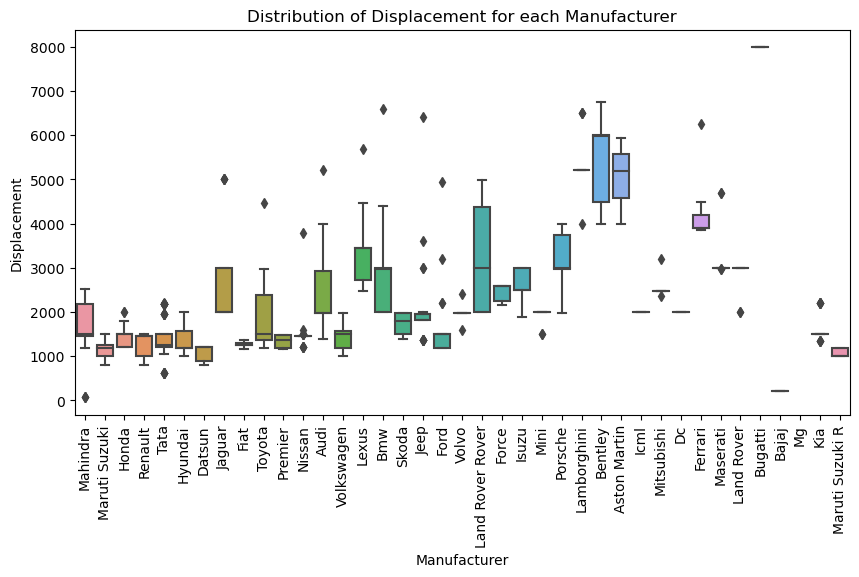

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5)) # Create a boxplot for 'Displacement' grouped by 'Make'
sns.boxplot(x='Make', y='Displacement',data=df_car) # A boxplot for 'Displacement' grouped by 'Make'
plt.xticks(rotation=90)  # Rotate x-axis labels 
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.title('Distribution of Displacement for each Manufacturer')
plt.show()

### INTERPRETATION:
Observe two type of displacement in make  500-3000 and 1500-6000.

# TASK4

In [49]:
car=df.loc[:,['Make','Displacement','Fuel_Tank_Capacity_litre','Cylinders','City_Mileage_km_litre']]
car

,Make,Displacement,Fuel_Tank_Capacity_litre,Cylinders,City_Mileage_km_litre
683,Mahindra,72.0,NaN,NaN,110.0
684,Mahindra,72.0,NaN,NaN,110.0
685,Mahindra,72.0,NaN,NaN,110.0
612,Mahindra,NaN,NaN,NaN,80.0
611,Mahindra,NaN,NaN,NaN,80.0
...,...,...,...,...,...
1232,Skoda,1968.0,50.0,4.0,NaN
1233,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN
1235,Porsche,2995.0,75.0,6.0,NaN


In [50]:
car_honda=car[(car['Make'])=='Honda']

mc_corrD=car_honda['City_Mileage_km_litre'].corr(car_honda['Displacement'])
mc_corrC=car_honda['City_Mileage_km_litre'].corr(car_honda['Cylinders'])
mc_corrF=car_honda['City_Mileage_km_litre'].corr(car_honda['Fuel_Tank_Capacity_litre'])

In [51]:
car_honda

,Make,Displacement,Fuel_Tank_Capacity_litre,Cylinders,City_Mileage_km_litre
939,Honda,1498.0,40.0,4.0,25.5
937,Honda,1498.0,40.0,4.0,25.5
935,Honda,1498.0,40.0,4.0,25.5
943,Honda,1498.0,40.0,4.0,25.5
941,Honda,1498.0,40.0,4.0,25.5
...,...,...,...,...,...
736,Honda,1799.0,47.0,4.0,NaN
737,Honda,1799.0,47.0,4.0,NaN
738,Honda,1799.0,47.0,4.0,NaN
739,Honda,1597.0,47.0,4.0,NaN


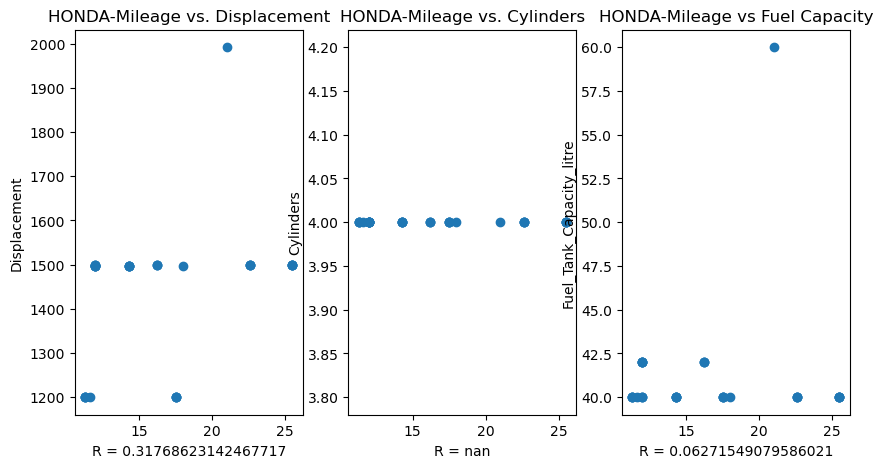

In [52]:

fig, ax = plt.subplots(1,3, figsize=(10, 5))
ax[0].scatter(x = car_honda['City_Mileage_km_litre'], y = car_honda['Displacement'])
ax[0].set_xlabel("R = "+str(mc_corrD))
ax[0].set_title('HONDA-Mileage vs. Displacement')
ax[0].set_ylabel("Displacement")


ax[1].scatter(x = car_honda['City_Mileage_km_litre'], y = car_honda['Cylinders'])
ax[1].set_xlabel("R = "+str(mc_corrC))
ax[1].set_ylabel("Cylinders")
ax[1].set_title('HONDA-Mileage vs. Cylinders')


ax[2].scatter(x = car_honda['City_Mileage_km_litre'], y = car_honda['Fuel_Tank_Capacity_litre'])
ax[2].set_xlabel("R = "+str(mc_corrF))
ax[2].set_title('HONDA-Mileage vs Fuel Capacity')
ax[2].set_ylabel("Fuel_Tank_Capacity_litre")
plt.show()

### INTERPRETATION:
As per the scatter plots-fuel tank capacity vs mileage is having positive correlation,displacement vs mileage is having positive correlation and cylinders vs mileage is having positive correlation.

In [53]:
car_Renault=car[(car['Make'])=='Renault']

mc_corrD=car_Renault['City_Mileage_km_litre'].corr(car_Renault['Displacement'])
mc_corrC=car_Renault['City_Mileage_km_litre'].corr(car_Renault['Cylinders'])
mc_corrF=car_Renault['City_Mileage_km_litre'].corr(car_Renault['Fuel_Tank_Capacity_litre'])

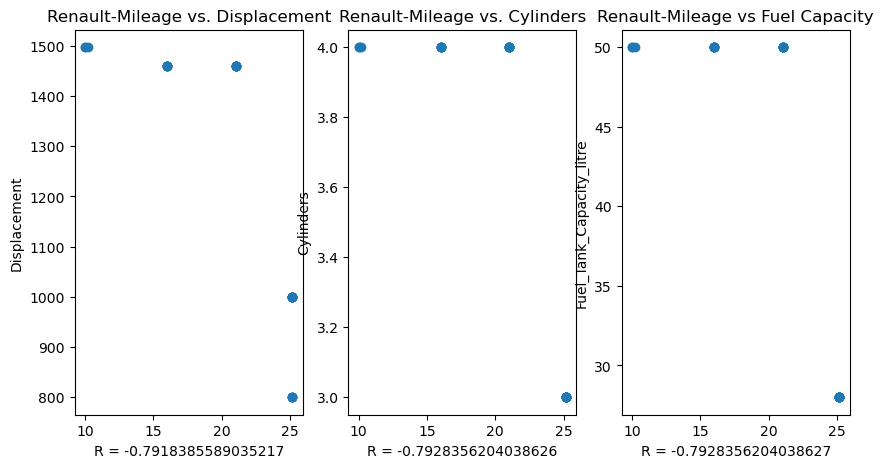

In [54]:

fig, ax = plt.subplots(1,3, figsize=(10, 5))
ax[0].scatter(x = car_Renault['City_Mileage_km_litre'], y = car_Renault['Displacement'])
ax[0].set_xlabel("R = "+str(mc_corrD))
ax[0].set_title('Renault-Mileage vs. Displacement')
ax[0].set_ylabel("Displacement")


ax[1].scatter(x = car_Renault['City_Mileage_km_litre'], y = car_Renault['Cylinders'])
ax[1].set_xlabel("R = "+str(mc_corrC))
ax[1].set_ylabel("Cylinders")
ax[1].set_title('Renault-Mileage vs. Cylinders')


ax[2].scatter(x = car_Renault['City_Mileage_km_litre'], y = car_Renault['Fuel_Tank_Capacity_litre'])
ax[2].set_xlabel("R = "+str(mc_corrF))
ax[2].set_title('Renault-Mileage vs Fuel Capacity')
ax[2].set_ylabel("Fuel_Tank_Capacity_litre")
plt.show()

### INTERPRETATION:
As per the scatter plots-fuel tank capacity vs mileage is having negative correlation,displacement vs mileage is having negative correlation and cylinders vs mileage is also having negative correlation.

In [55]:
car_Toyota=car[(car['Make'])=='Toyota']

mc_corrD=car_Toyota['City_Mileage_km_litre'].corr(car_Toyota['Displacement'])
mc_corrC=car_Toyota['City_Mileage_km_litre'].corr(car_Toyota['Cylinders'])
mc_corrF=car_Toyota['City_Mileage_km_litre'].corr(car_Toyota['Fuel_Tank_Capacity_litre'])

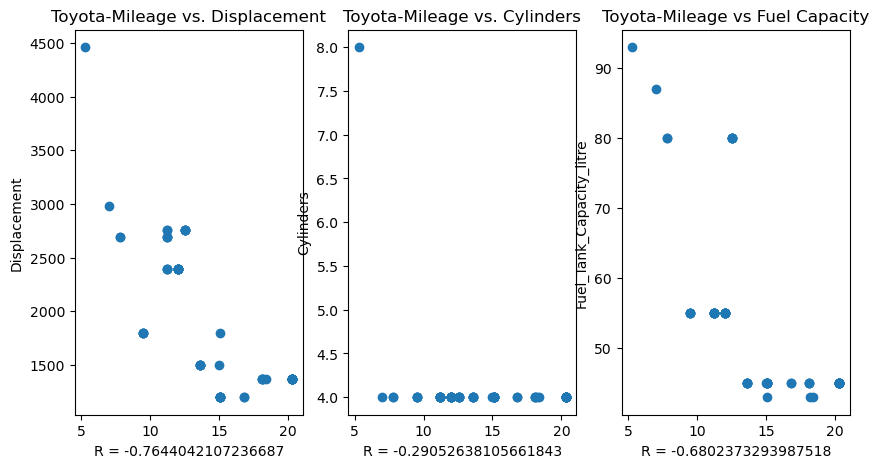

In [56]:

fig, ax = plt.subplots(1,3, figsize=(10, 5))
ax[0].scatter(x = car_Toyota['City_Mileage_km_litre'], y = car_Toyota['Displacement'])
ax[0].set_xlabel("R = "+str(mc_corrD))
ax[0].set_title('Toyota-Mileage vs. Displacement')
ax[0].set_ylabel("Displacement")


ax[1].scatter(x = car_Toyota['City_Mileage_km_litre'], y = car_Toyota['Cylinders'])
ax[1].set_xlabel("R = "+str(mc_corrC))
ax[1].set_ylabel("Cylinders")
ax[1].set_title('Toyota-Mileage vs. Cylinders')


ax[2].scatter(x = car_Toyota['City_Mileage_km_litre'], y = car_Toyota['Fuel_Tank_Capacity_litre'])
ax[2].set_xlabel("R = "+str(mc_corrF))
ax[2].set_title('Toyota-Mileage vs Fuel Capacity')
ax[2].set_ylabel("Fuel_Tank_Capacity_litre")
plt.show()

### INTERPRETATION:
As per the scatter plots-fuel tank capacity vs mileage is having negative correlation,displacement vs mileage is having negative correlation and cylinders vs mileage is also having negative correlation.

# Weight Distribution Study

# TASK5

AttributeError: Can only use .str accessor with string values!

In [76]:
df_car['Gross_Vehicle_Weight'] = df_car['Gross_Vehicle_Weight'].fillna(0)

In [77]:
df_car['Gross_Vehicle_Weight'].unique()

array([1700., 1257., 1405., 1590.,    0., 1520., 1670., 1250., 1350.,
       1160., 1545., 1522., 1523., 1550., 1360., 2460., 1170., 1338.,
       1995., 1650., 1475., 1530.,  205., 1680., 1425., 1531., 1930.,
       1210., 1620., 1042., 1420., 2840., 2225., 2410., 1185., 3350.,
       1630., 1770., 1482., 1655., 1890., 1750., 1125., 2000., 1540.,
       1764., 1580., 2020., 1315., 1415., 1720., 2510., 2450., 2300.,
       1787., 1777., 1813., 1500., 1758., 2060., 1790., 2315., 1505.,
       1438., 1459., 1455., 1436., 2775., 2650., 2220., 1285., 2560.,
       2705., 2500., 2110., 2590., 2040., 2955., 2949., 2610., 2735.,
       2010., 2185., 1461., 1710., 1510., 2205., 2480., 2430., 2475.,
       2030., 2570., 2555., 2505., 1585., 1755., 2150., 3250., 1660.,
       1695., 1965., 2925., 2081., 3110., 3100., 3150., 1985., 1614.,
       1895., 2200., 2230., 2585., 2635., 2990., 2600., 3200., 2900.,
       3000., 2210., 2250., 2750., 2109., 2350., 2972., 1340., 1950.,
       2025., 1955.,

In [78]:
df_car['Gross_Vehicle_Weight'] = df_car['Gross_Vehicle_Weight'].str.replace(r"kg",'') # replacing all occurances of kg with "" (nothing) i.e removing "kg"

AttributeError: Can only use .str accessor with string values!

In [79]:
df_car.Gross_Vehicle_Weight = df_car.Gross_Vehicle_Weight.astype(float)

In [80]:
df_car.drop(df_car.index[df_car['Gross_Vehicle_Weight'] =='2155â€¯ '], inplace = True)

In [81]:
df_car.drop(df_car.index[df_car['Gross_Vehicle_Weight'] =='NA '], inplace = True)

In [82]:
df_car.Gross_Vehicle_Weight = df_car.Gross_Vehicle_Weight.astype(float)

In [83]:
df_car.Gross_Vehicle_Weight.isnull().sum()

0

In [84]:
x=df_car.groupby(by='Make')['Kerb_Weight','Gross_Vehicle_Weight'].agg(['mean','median','std'])
x

Kerb_Weight                      Gross_Vehicle_Weight  \
                         mean  median          std                 mean   
Make                                                                      
Aston Martin      3813.333333  3696.0   516.102057           693.666667   
Audi              3984.933333  3916.0   765.930263          2219.333333   
Bajaj                0.000000     0.0     0.000000             0.000000   
Bentley           5407.233333  5335.0   268.974331          3065.666667   
Bmw               2142.740541  3498.0  1905.462455          1125.945946   
Bugatti           4389.000000  4389.0     0.000000             0.000000   
Datsun            1140.480000  1900.8   963.881524             0.000000   
Dc                3476.000000  3476.0          NaN          1580.000000   
Ferrari           3595.428571  3355.0   485.640078             0.000000   
Fiat              2412.347826  2662.0   769.386861           276.739130   
Force                0.000000     0.0     0.000000          1761.666667   
Ford              2519.818605  2325.4   902.852643           469.186047   
Honda             2390.368750  2391.4   549.402808           599.687500   
Hyundai            898.321875     0.0  1205.887282           449.890625   
Icml              3780.480000  3762.0    29.755627          2475.000000   
Isuzu             2558.600000  4257.0  2335.688828           886.000000   
Jaguar            3295.600000  3747.7  1357.777820          1631.090909   
Jeep              3621.592857  3436.4   987.580130           421.928571   
Kia                  0.000000     0.0     0.000000             0.000000   
Lamborghini       2845.276923  3128.4  1348.200192             0.000000   
Land Rover         918.280000     0.0  1935.904220             0.000000   
Land Rover Rover  3935.148148  4694.8  2225.653455          2260.000000   
Lexus             4801.940000  4944.5   752.342854          2495.000000   
Mahindra          1740.384874     0.0  1867.495666          1205.495798   
Maruti Suzuki     2031.744595  1985.5   414.087657          1214.898649   
Maruti Suzuki R    260.857143     0.0   663.087285           191.428571   
Maserati          2741.444444  3982.0  2059.908075          1224.777778   
Mg                   0.000000     0.0     0.000000             0.000000   
Mini              1859.000000  2744.5  1662.047867           171.000000   
Mitsubishi        4311.057143  4257.0   473.287886          2610.000000   
Nissan             879.620690     0.0  1363.429359           415.379310   
Porsche           3683.428571  4103.0  1782.208169          1765.714286   
Premier           2471.333333  2519.0    73.844882          1530.000000   
Renault           1997.172222  2083.4   948.459315           636.083333   
Skoda             2960.841860  2948.0   372.176373          1816.395349   
Tata              1535.842000  1595.0  1629.225241           397.360000   
Toyota            2562.812195  2332.0  1142.690020          1661.463415   
Volkswagen        2653.717647  2525.6   436.796021          1462.647059   
Volvo             4089.213333  3663.0  2140.273975          1129.400000   

                                       
                  median          std  
Make                                   
Aston Martin         0.0  1201.465910  
Audi              2185.0   572.055781  
Bajaj                0.0     0.000000  
Bentley           3086.0   201.591336  
Bmw                  0.0  1189.966058  
Bugatti              0.0     0.000000  
Datsun               0.0     0.000000  
Dc                1580.0          NaN  
Ferrari              0.0     0.000000  
Fiat                 0.0   594.175534  
Force             2510.0  1369.717732  
Ford                 0.0   763.081106  
Honda                0.0   645.492943  
Hyundai              0.0   660.245352  
Icml              2460.0    24.152295  
Isuzu                0.0  1213.251829  
Jaguar            2190.0  1037.419643  
Jeep                 0.0  1052.475246  
Kia                  0.0   

In [85]:
a=df_car.groupby(by='Make')['Kerb_Weight','Gross_Vehicle_Weight'].std()
b=df_car.groupby(by='Make')['Kerb_Weight','Gross_Vehicle_Weight'].mean()

In [86]:
c=((a/b)*100)

In [87]:
c

,Kerb_Weight,Gross_Vehicle_Weight
Make,,
Aston Martin,13.534145,173.205081
Audi,19.220654,25.776019
Bajaj,NaN,NaN
Bentley,4.974343,6.575775
Bmw,88.926420,105.685896
Bugatti,0.000000,NaN
Datsun,84.515425,NaN
Dc,NaN,NaN
Ferrari,13.507154,NaN


In [88]:
c.columns=['(Kerb_Weight,CV)','(Gross_Vehicle_Weight,CV)']

In [89]:
c

,"(Kerb_Weight,CV)","(Gross_Vehicle_Weight,CV)"
Make,,
Aston Martin,13.534145,173.205081
Audi,19.220654,25.776019
Bajaj,NaN,NaN
Bentley,4.974343,6.575775
Bmw,88.926420,105.685896
Bugatti,0.000000,NaN
Datsun,84.515425,NaN
Dc,NaN,NaN
Ferrari,13.507154,NaN


In [90]:
df_car1 = pd.concat([x, c], axis=1)

In [91]:
df_car1

,"(Kerb_Weight, mean)","(Kerb_Weight, median)","(Kerb_Weight, std)","(Gross_Vehicle_Weight, mean)","(Gross_Vehicle_Weight, median)","(Gross_Vehicle_Weight, std)","(Kerb_Weight,CV)","(Gross_Vehicle_Weight,CV)"
Make,,,,,,,,
Aston Martin,3813.333333,3696.0,516.102057,693.666667,0.0,1201.465910,13.534145,173.205081
Audi,3984.933333,3916.0,765.930263,2219.333333,2185.0,572.055781,19.220654,25.776019
Bajaj,0.000000,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN
Bentley,5407.233333,5335.0,268.974331,3065.666667,3086.0,201.591336,4.974343,6.575775
Bmw,2142.740541,3498.0,1905.462455,1125.945946,0.0,1189.966058,88.926420,105.685896
Bugatti,4389.000000,4389.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN
Datsun,1140.480000,1900.8,963.881524,0.000000,0.0,0.000000,84.515425,NaN
Dc,3476.000000,3476.0,NaN,1580.000000,1580.0,NaN,NaN,NaN
Ferrari,3595.428571,3355.0,485.640078,0.000000,0.0,0.000000,13.507154,NaN


In [ ]:
INTERPRETATION:


# Safety Feature Assessment

# TASK1

In [92]:
df_safe= df[['Make','Model','ABS_(Anti-lock_Braking_System)','Airbags','Hill_Assist']].copy()

In [93]:
df_safe.isnull().sum()

Make                               75
Model                               0
ABS_(Anti-lock_Braking_System)    131
Airbags                           131
Hill_Assist                       787
dtype: int64

In [94]:
df_safe[(df_safe['ABS_(Anti-lock_Braking_System)']=='Yes') & (df_safe['Airbags']!='NaN')& (df_safe['Hill_Assist']=='Yes')]

,Make,Model,ABS_(Anti-lock_Braking_System),Airbags,Hill_Assist
1081,Maruti Suzuki,Ciaz,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
1082,Maruti Suzuki,Ciaz,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
1080,Maruti Suzuki,Ciaz,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
939,Honda,Wr-V,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
937,Honda,Wr-V,Yes,"Driver frontal airbag, Front passenger frontal...",Yes
...,...,...,...,...,...
1232,Skoda,Octavia,Yes,"Drive side airbag, Driver frontal airbag, Fron...",Yes
1233,NaN,Mercedes-Benz Glc,Yes,"Front passenger curtain airbag, Driver curtain...",Yes
1234,NaN,Mercedes-Benz Glc,Yes,"Front passenger curtain airbag, Driver curtain...",Yes
1235,Porsche,Cayenne Coupe,Yes,"Driver pelvic airbag, Driver curtain airbag, R...",Yes


In [ ]:
df_safe['Make'].unique()

### INTERPRETATION:
472 cars are listed with safsty features like ABS,Airbags and Hill assist.

# User Comfort Exploration


In [95]:
df_safe1= df[['Make','Model','Seating_Capacity','Central_Locking','Child_Safety_Locks']].copy()

In [96]:
df_safe1

,Make,Model,Seating_Capacity,Central_Locking,Child_Safety_Locks
683,Mahindra,E Verito,5.0,NaN,Yes
684,Mahindra,E Verito,5.0,NaN,Yes
685,Mahindra,E Verito,5.0,Yes,Yes
612,Mahindra,E2O Plus,4.0,NaN,Yes
611,Mahindra,E2O Plus,4.0,NaN,Yes
...,...,...,...,...,...
1232,Skoda,Octavia,5.0,Yes,Yes
1233,NaN,Mercedes-Benz Glc,5.0,Yes,Yes
1234,NaN,Mercedes-Benz Glc,5.0,Yes,Yes
1235,Porsche,Cayenne Coupe,NaN,Yes,Yes


In [97]:
df_safe1['Seating_Capacity'].mean()

5.273961661341853

In [98]:
df_safe1[(df_safe1['Seating_Capacity']>=5)& (df_safe1['Central_Locking']=='Yes') & (df_safe1['Child_Safety_Locks']=='Yes')]

,Make,Model,Seating_Capacity,Central_Locking,Child_Safety_Locks
685,Mahindra,E Verito,5.0,Yes,Yes
159,Maruti Suzuki,Dzire,5.0,Yes,Yes
160,Maruti Suzuki,Dzire,5.0,Yes,Yes
164,Maruti Suzuki,Dzire,5.0,Yes,Yes
165,Maruti Suzuki,Dzire,5.0,Yes,Yes
...,...,...,...,...,...
1230,Skoda,Octavia,5.0,Yes,Yes
1231,Skoda,Octavia,5.0,Yes,Yes
1232,Skoda,Octavia,5.0,Yes,Yes
1233,NaN,Mercedes-Benz Glc,5.0,Yes,Yes


In [114]:
df_safe1['Make'].unique()

array(['Mahindra', 'Maruti Suzuki', 'Honda', 'Renault', 'Tata', 'Hyundai',
       'Datsun', 'Jaguar', 'Fiat', 'Toyota', 'Premier', 'Nissan', 'Audi',
       'Volkswagen', 'Lexus', 'Bmw', 'Skoda', 'Jeep', 'Ford', 'Volvo',
       'Land Rover Rover', 'Force', 'Isuzu', 'Mini', 'Porsche',
       'Lamborghini', 'Bentley', 'Aston Martin', 'Icml', 'Mitsubishi',
       'Dc', 'Ferrari', 'Maserati', nan, 'Land Rover', 'Bugatti', 'Bajaj',
       'Mg', 'Kia', 'Maruti Suzuki R'], dtype=object)

### INTERPRETATION:
    There are 998 such cars with seating capacity more than mean(5) ,central locking and child safety locks like family friendly features

# Alert Systems Analysis 

# TASK3

In [99]:
df_alert= df[['Make','Model','High_Speed_Alert_System','Passenger_Side_Seat-Belt_Reminder','Door_Ajar_Warning']].copy()

In [100]:
df_alert

,Make,Model,High_Speed_Alert_System,Passenger_Side_Seat-Belt_Reminder,Door_Ajar_Warning
683,Mahindra,E Verito,NaN,NaN,NaN
684,Mahindra,E Verito,NaN,NaN,NaN
685,Mahindra,E Verito,NaN,NaN,Yes
612,Mahindra,E2O Plus,NaN,NaN,Yes
611,Mahindra,E2O Plus,NaN,NaN,Yes
...,...,...,...,...,...
1232,Skoda,Octavia,Yes,Yes,Yes
1233,NaN,Mercedes-Benz Glc,Yes,Yes,Yes
1234,NaN,Mercedes-Benz Glc,Yes,Yes,Yes
1235,Porsche,Cayenne Coupe,Yes,Yes,Yes


In [101]:
df_alert[(df_alert['High_Speed_Alert_System']=='Yes')& (df_alert['Passenger_Side_Seat-Belt_Reminder']=='Yes') & (df_alert['Door_Ajar_Warning']=='Yes')]

,Make,Model,High_Speed_Alert_System,Passenger_Side_Seat-Belt_Reminder,Door_Ajar_Warning
1253,Honda,City,Yes,Yes,Yes
1251,Honda,City,Yes,Yes,Yes
1252,Honda,City,Yes,Yes,Yes
1254,Honda,City,Yes,Yes,Yes
1115,Hyundai,Creta,Yes,Yes,Yes
...,...,...,...,...,...
1232,Skoda,Octavia,Yes,Yes,Yes
1233,NaN,Mercedes-Benz Glc,Yes,Yes,Yes
1234,NaN,Mercedes-Benz Glc,Yes,Yes,Yes
1235,Porsche,Cayenne Coupe,Yes,Yes,Yes


In [115]:
df_alert['Make'].unique()

array(['Mahindra', 'Maruti Suzuki', 'Honda', 'Renault', 'Tata', 'Hyundai',
       'Datsun', 'Jaguar', 'Fiat', 'Toyota', 'Premier', 'Nissan', 'Audi',
       'Volkswagen', 'Lexus', 'Bmw', 'Skoda', 'Jeep', 'Ford', 'Volvo',
       'Land Rover Rover', 'Force', 'Isuzu', 'Mini', 'Porsche',
       'Lamborghini', 'Bentley', 'Aston Martin', 'Icml', 'Mitsubishi',
       'Dc', 'Ferrari', 'Maserati', nan, 'Land Rover', 'Bugatti', 'Bajaj',
       'Mg', 'Kia', 'Maruti Suzuki R'], dtype=object)

### INTERPRETATION:
    140 such cars with high speed alert system,passenger seat belt reminders and door ajar warning

# Dimensional Analysis

# TASK4

In [102]:
df_dimen= df[['Make','Model','Body_Type','Height_mm','Length_mm','Width_mm']].copy()

In [103]:
df_dimen

,Make,Model,Body_Type,Height_mm,Length_mm,Width_mm
683,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
684,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
685,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
612,Mahindra,E2O Plus,Hatchback,1585.0,3390.0,1575.0
611,Mahindra,E2O Plus,Hatchback,1585.0,3390.0,1575.0
...,...,...,...,...,...,...
1232,Skoda,Octavia,Sedan,1476.0,4670.0,1814.0
1233,NaN,Mercedes-Benz Glc,SUV,1644.0,4658.0,1890.0
1234,NaN,Mercedes-Benz Glc,SUV,1644.0,4658.0,1890.0
1235,Porsche,Cayenne Coupe,NaN,1676.0,4931.0,2194.0


In [104]:
a1=df_dimen[(df_dimen['Height_mm']>=1000 ) & (df_dimen['Height_mm']<=1500 ) ]

In [105]:
a1['Body_Type'].unique()

array(['Sedan', 'Hatchback', 'Convertible', 'SUV', 'Coupe',
       'Sedan, Coupe', 'Sports', 'Coupe, Convertible',
       'Sports, Hatchback', 'Sports, Convertible', nan], dtype=object)

In [106]:
a1['Make'].unique()

array(['Maruti Suzuki', 'Renault', 'Honda', 'Hyundai', 'Audi',
       'Volkswagen', 'Toyota', 'Skoda', 'Lexus', 'Fiat', 'Volvo', 'Bmw',
       'Mini', 'Jaguar', 'Porsche', 'Lamborghini', 'Ford', 'Aston Martin',
       'Nissan', 'Dc', 'Ferrari', 'Bentley', 'Maserati', nan, 'Bugatti'],
      dtype=object)

In [107]:
a1

,Make,Model,Body_Type,Height_mm,Length_mm,Width_mm
1072,Maruti Suzuki,Ciaz,Sedan,1485.0,4490.0,1730.0
1074,Maruti Suzuki,Ciaz,Sedan,1485.0,4490.0,1730.0
1073,Maruti Suzuki,Ciaz,Sedan,1485.0,4490.0,1730.0
1075,Maruti Suzuki,Ciaz,Sedan,1485.0,4490.0,1730.0
897,Maruti Suzuki,Baleno,Hatchback,1500.0,3995.0,1745.0
...,...,...,...,...,...,...
1228,Skoda,Octavia,Sedan,1476.0,4670.0,1814.0
1229,Skoda,Octavia,Sedan,1476.0,4670.0,1814.0
1230,Skoda,Octavia,Sedan,1476.0,4670.0,1814.0
1231,Skoda,Octavia,Sedan,1476.0,4670.0,1814.0


In [108]:
a2=df_dimen[(df_dimen['Height_mm']>1500 ) & (df_dimen['Height_mm']<=2000 ) ]

In [109]:
a2['Make'].unique()

array(['Mahindra', 'Maruti Suzuki', 'Honda', 'Tata', 'Hyundai', 'Datsun',
       'Jaguar', 'Fiat', 'Renault', 'Toyota', 'Premier', 'Nissan',
       'Lexus', 'Bmw', 'Jeep', 'Ford', 'Land Rover Rover', 'Volvo',
       'Isuzu', 'Audi', 'Bentley', 'Icml', 'Mitsubishi', 'Maserati',
       'Volkswagen', nan, 'Land Rover', 'Lamborghini', 'Bajaj', 'Mg',
       'Kia', 'Skoda', 'Porsche', 'Mini', 'Maruti Suzuki R'], dtype=object)

In [110]:
a2

,Make,Model,Body_Type,Height_mm,Length_mm,Width_mm
683,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
684,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
685,Mahindra,E Verito,Sedan,1540.0,4247.0,1740.0
612,Mahindra,E2O Plus,Hatchback,1585.0,3390.0,1575.0
611,Mahindra,E2O Plus,Hatchback,1585.0,3390.0,1575.0
...,...,...,...,...,...,...
1202,NaN,Rolls-Royce Phantom,Sedan,1640.0,6092.0,1990.0
1233,NaN,Mercedes-Benz Glc,SUV,1644.0,4658.0,1890.0
1234,NaN,Mercedes-Benz Glc,SUV,1644.0,4658.0,1890.0
1235,Porsche,Cayenne Coupe,NaN,1676.0,4931.0,2194.0


In [111]:
a3=df_dimen[(df_dimen['Height_mm']>2000 ) & (df_dimen['Height_mm']<2600 ) ]

In [112]:
a3

,Make,Model,Body_Type,Height_mm,Length_mm,Width_mm
632,Force,Gurkha,SUV,2055.0,3992.0,1790.0
631,Force,Gurkha,SUV,2055.0,4342.0,1790.0
630,Force,Gurkha,SUV,2075.0,3992.0,1820.0
627,Force,Gurkha,SUV,2055.0,4342.0,1790.0
628,Force,Gurkha,SUV,2055.0,3992.0,1790.0
629,Force,Gurkha,SUV,2075.0,3992.0,1820.0


In [113]:
a3['Body_Type'].unique()

array(['SUV'], dtype=object)

### INTERPRETATION:
We can categories the vehicle into three on the basis of length
length<=1500: there are 339 cars from different makers with different body types
length between 1500 and 2000:There are 911 cars are from different makers with different body types
length between 2000 and 2600:There are only 6 cars from Force.